# Exploratory data analysis

- Data preparation (data description, missing values)
- Distributions of target (rented bycycles) for different variables
- Correlation between variables to identify features with redundant information
- Distribution of target variable, oultliers identification and  logaritmic representation

(please refer questions/suggestions to: <cesarliz10@gmail.com> **:-)** )

In [1]:
import requests, zipfile, io
# file downloading
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
request_zip = requests.get(url)
zf = zipfile.ZipFile(io.BytesIO(request_zip.content))
zf.extractall()
zf.namelist()

['Readme.txt', 'day.csv', 'hour.csv']

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

from scipy.stats import skew
import pandas as pd
import numpy as np
#df_day = pd.read_csv("day.csv")
df_hour = pd.read_csv("hour.csv")
df_hour.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [3]:
# general properties of the data file
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


According to the previous information there are no missing values to drop. We can verify it easily:

In [4]:
print("Missing values: {}".format( np.sum(df_hour.isna().agg("sum") ) ))

Missing values: 0


The data seems to be already sorted into ascending dates and hours. Is it the case? When does it finish?

In [5]:
df_hour["dteday"].astype("datetime64")
df_hour.index.to_list() == df_hour.sort_values(by=["dteday","hr"],ascending=True).index.to_list()

True

In [6]:
df_hour.iloc[-3:]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [7]:
df_hour.set_index("instant",inplace=True)

<IPython.core.display.Javascript object>


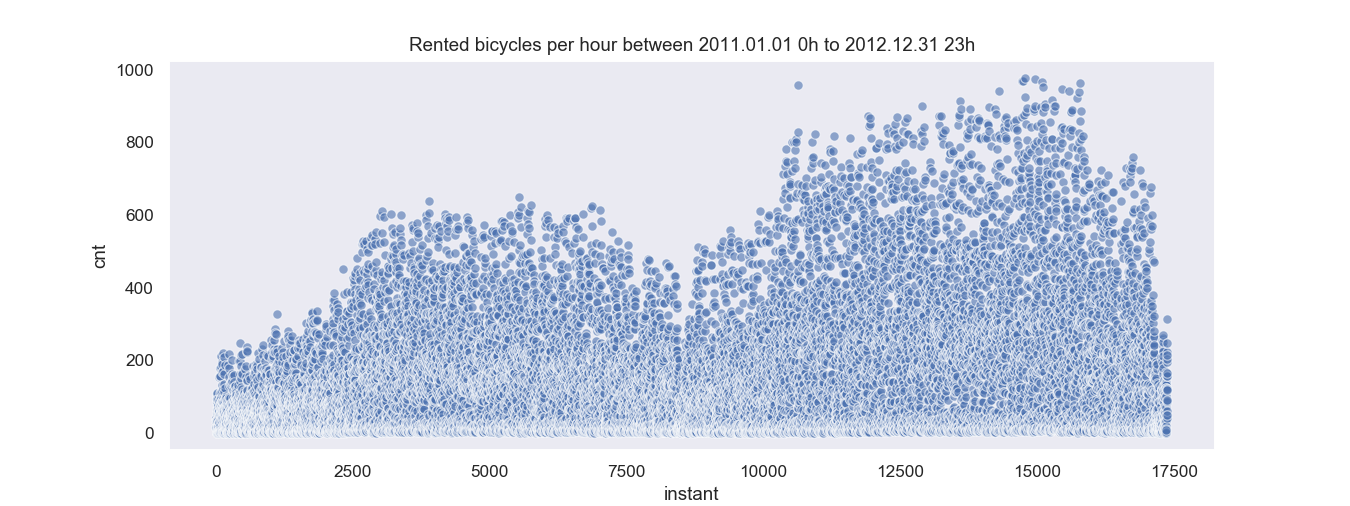

In [69]:
plt.figure(figsize=(12,4.5))
plt.gca().set(title="Rented bicycles per hour between 2011.01.01 0h to 2012.12.31 23h")
sns.scatterplot(y="cnt",x="instant",data=df_hour.reset_index(),alpha=0.6)

## Distribution of rented bicycles for different variables 

In [9]:
# the following function plots the distribution of rented bycycles for each input variable.
# A barplot or lineplot is chosen according to dtype (for categorical and continuous variables): 
def plots_rented_bycycles_distributions(variables,saveplot=False):
    sns.set(style="whitegrid")
    num_of_vars = len(variables)
    plt.figure(figsize=(8.3,3.3*num_of_vars))
    for i,var in enumerate(variables):
        ax = plt.subplot(num_of_vars,1,i+1)
        sns.set_color_codes("pastel")
        if df_hour[var].dtype == 'int64':
            sns.barplot(x=var,y='cnt', data=df_hour,color='b',ax=ax,label='total',errwidth=0.6,capsize=0.1)
            sns.set_color_codes("muted")
            sns.barplot(x=var,y='registered', data=df_hour,color='b',ax=ax,label='only registered',errwidth=0)
        if df_hour[var].dtype == 'float64':
            sns.lineplot(x=var,y='cnt', data=df_hour,color='b',ax=ax,label='total')
            sns.lineplot(x=var,y='registered', data=df_hour,color='g',ax=ax,label='only registered')
        ax.legend(ncol=2, loc="upper center", frameon=True)
        ax.set( ylabel="rented bycycles", ylim= [0, 1.1 *ax.get_ylim()[1] ] )
        sns.despine(top=True, right=True,left=True)
        plt.tight_layout()
        if saveplot:
            plt.savefig("./report/"+"_".join(variables)+".png",format='png')
    return

### Time-related variables (season,mnth,hr):

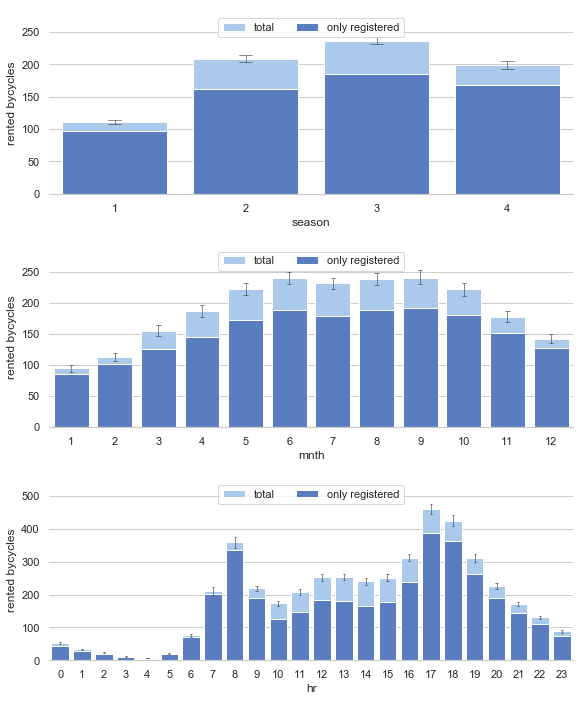

In [10]:
plots_rented_bycycles_distributions(["season","mnth","hr"])

### Day-category  variables (weekday, holiday,workingday)

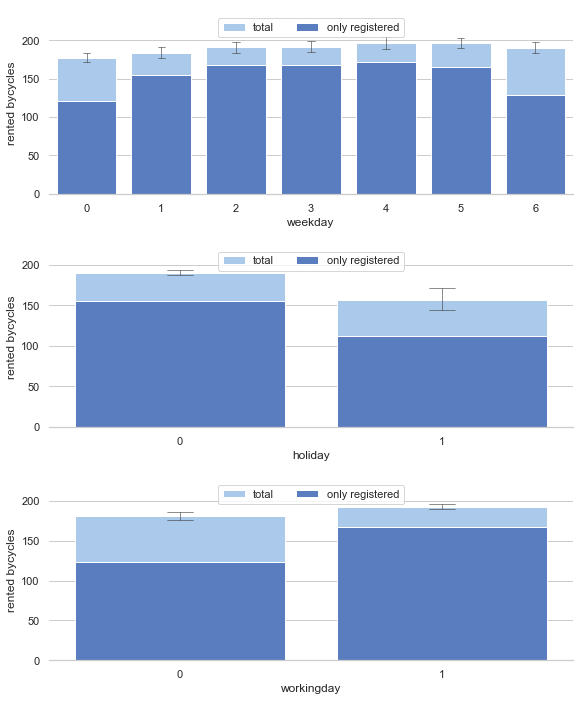

In [11]:
plots_rented_bycycles_distributions(["weekday","holiday","workingday"])

### Climate-related variables (temp, atemp, hum, windspeed)

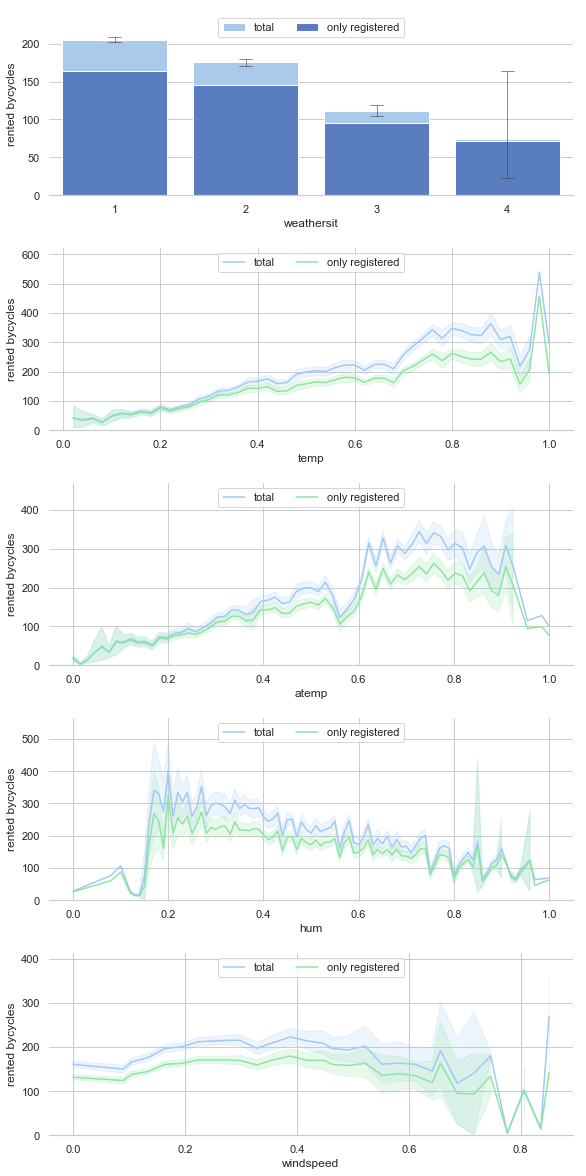

In [12]:
plots_rented_bycycles_distributions(["weathersit","temp", "atemp", "hum", "windspeed"])

## Liner correlation between numerical variables

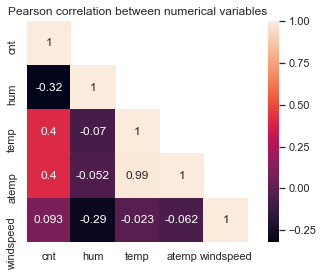

In [13]:
# pearson corr used  for numerical (continuous) variables
variables = [ "hum","temp", "atemp","windspeed"]
var_corr = df_hour[ ["cnt"] + variables ].corr()
plot_mask = np.array(var_corr) 
plot_mask[ np.tril_indices_from(plot_mask) ] = False
fig = plt.subplots()
ax = sns.heatmap(var_corr, mask=plot_mask, vmax=1, square=True, annot=True)
ax.set_title("Pearson correlation between numerical variables")
#plt.savefig("./../report/"+"_".join(variables)+".png",format='png')
plt.tight_layout()

In [14]:
# correlation between 'holiday' and 'workingday' variables:
# kendall corr. used for categorical data.
df_hour[["holiday","workingday"]].corr(method="kendall")

,holiday,workingday
holiday,1.000000,-0.252471
workingday,-0.252471,1.000000


## Target distribution (Frecuency histogram)

<IPython.core.display.Javascript object>


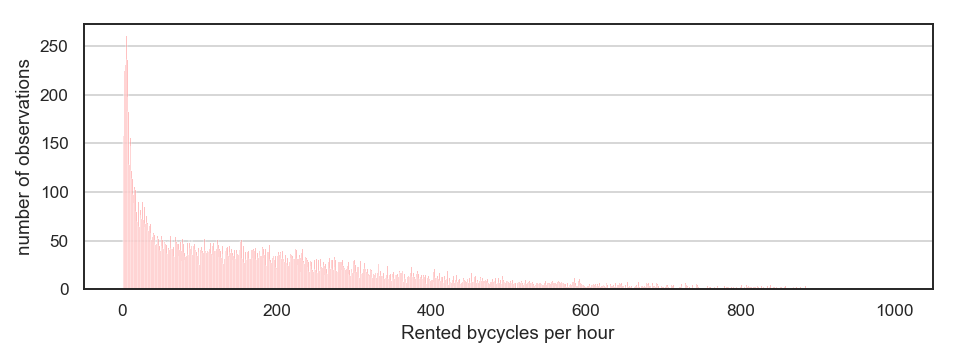

In [189]:
sns.set_style("white")
f1 = plt.figure(figsize=(8.5,3.2))
ax1 = sns.distplot(df_hour.cnt,norm_hist=False,kde=False,bins=range(0,1000,1),color="red")
plt.gca().set(xlabel="Rented bycycles per hour",ylabel="number of observations")
plt.gca().yaxis.grid(); plt.tight_layout()
#plt.savefig("./report/target_frec_histo.png",format='png')

Several questions from this distribution should be explored:  
- Where to put a cut-off to distinguish outliers (e.g. an example is outlier if cnt > cut-off)
- Does the logaritmic representation of the target variable can lead to models with smaller errors? 


### Logaritmic transformation

<IPython.core.display.Javascript object>


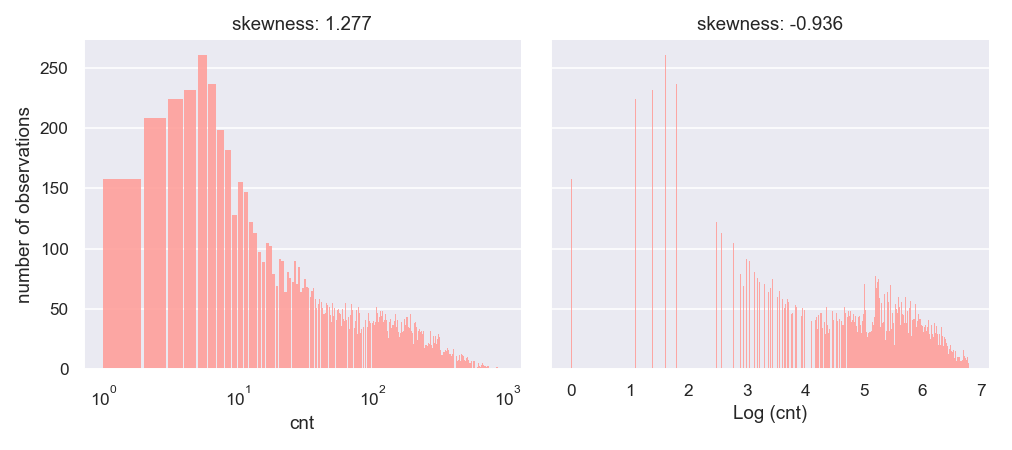

In [199]:
sns.set_style("dark")
_, (ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(9,4))

sns.distplot(df_hour["cnt"],norm_hist=False,kde=False,color="red",bins=range(0,900,1),ax=ax1,
             hist_kws={"histtype": "bar", "alpha": 0.9, "color": "r","linewidth":0,"width":0.9})
t= "skewness: {:0.3f}".format(skew(df_hour.cnt))
ax1.set(xscale="log",ylabel="number of observations",title=t)
ax1.yaxis.grid()


df_hour["log_cnt"] = df_hour["cnt"].apply(np.log)
sns.distplot(df_hour["log_cnt"],norm_hist=False,kde=False, bins=np.linspace(0,np.log(900),num=900,endpoint=False,), ax=ax2,
             hist_kws={"histtype": "bar", "linewidth": 0, "alpha": 0.9, "color": "r"})
t= "skewness: {:0.3f}".format(skew(df_hour.log_cnt))
ax2.set(xlabel="Log (cnt)",title=t)
ax2.yaxis.grid()

plt.tight_layout()
sns.despine()
#plt.savefig("./report/target_frec_histo_log.png",format='png')

### Relation with a Poisson distribution

<IPython.core.display.Javascript object>


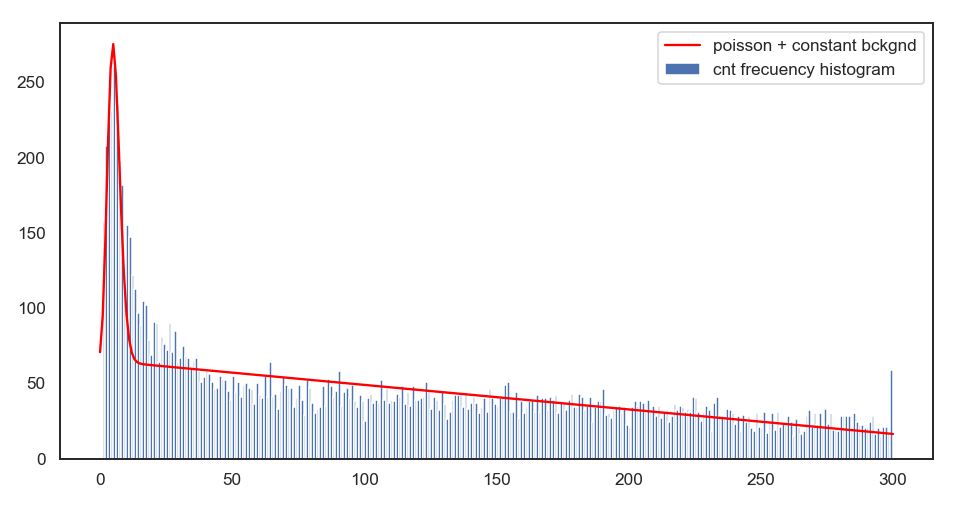

5 260.0 30
optimized pars [ 5.40995705e+00  1.22224137e+03  6.52644128e+01 -1.63067229e-01]


c:\users\c.lizarazosabogal\appdata\local\programs\python\python35\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
c:\users\c.lizarazosabogal\appdata\local\programs\python\python35\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


In [105]:
from scipy.stats import poisson
from scipy.optimize import curve_fit

plt.figure(figsize=(8.5,4.5))
bins,bins_x,_ = plt.hist(df_hour.cnt.values,range=(0,300),bins=300,label = "cnt frecuency histogram")
# mu = average event ocurrence rate, it is reasonable to match this value to the cnt value most frecuent.
muish= np.squeeze(np.where( bins == bins.max())[0])
heigthish =bins.max() 
backgnd_guess = 30
print(muish,heigthish,backgnd_guess)
def poisson_like( x, mu ,c,b,d):
    return c*poisson.pmf(mu=mu,k=x) + d*x+b
popt, pcov = curve_fit(poisson_like, bins_x[:-1], bins,p0=[ muish, heigthish, backgnd_guess,-0.001])
sns.lineplot(x=bins_x,y=poisson_like(bins_x,*popt),c="red",label="poisson + constant bckgnd")
plt.legend()
print("optimized pars "+str(popt))
plt.tight_layout()

### Parametric transformations to make data more gaussian-like

<IPython.core.display.Javascript object>


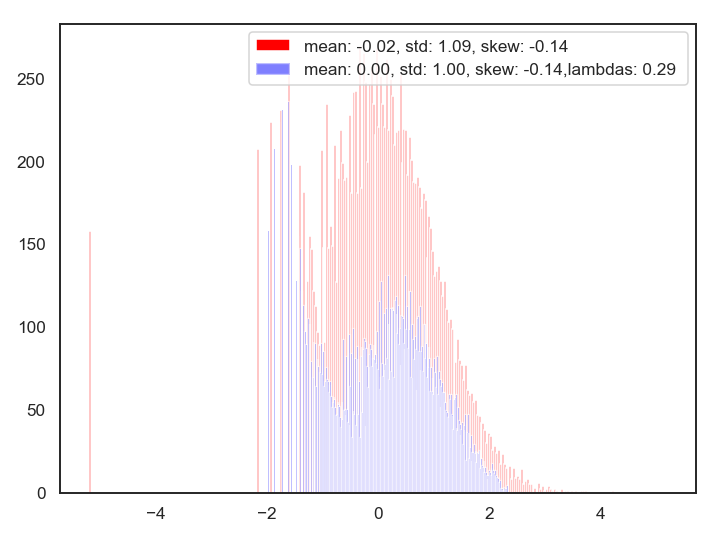

In [182]:
## attempt with  QuantileTransformer and PowerTransformer for target variable in order to get a normal-like distrib
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py

from sklearn.preprocessing import QuantileTransformer, PowerTransformer
rng = np.random.RandomState(0)

qt = QuantileTransformer(output_distribution='normal', random_state=rng)
y_qt= qt.fit(df_hour.cnt.values.reshape(-1, 1)).transform(df_hour.cnt.values.reshape(-1, 1))
lab_qt = "mean: {:0.2f}, std: {:0.2f}, skew: {:0.2f}".format(y_qt.mean(),y_qt.std(),stats.skew(np.squeeze(y_bc)))

bc = PowerTransformer()
y_bc = bc.fit(df_hour.cnt.values.reshape(-1, 1)).transform(df_hour.cnt.values.reshape(-1, 1))
lmbda_bc = round(bc.lambdas_[0], 2)
lab_bc = "mean: {:0.2f}, std: {:0.2f}, skew: {:0.2f},lambdas: {:0.2f} ".format(y_bc.mean(),y_bc.std(),stats.skew(np.squeeze(y_bc)),lmbda_bc)

plt.figure()
plt.hist(y_qt,bins=300,label = lab_qt,color="red")
plt.hist(y_bc,bins=300,label = lab_bc,color="blue",histtype= "bar", linewidth= 1.5, alpha= 0.5)
plt.legend();plt.tight_layout()

Indeed the logaritmic transformation decreases the distribution skewness:

## correlation plot for different variables

<IPython.core.display.Javascript object>


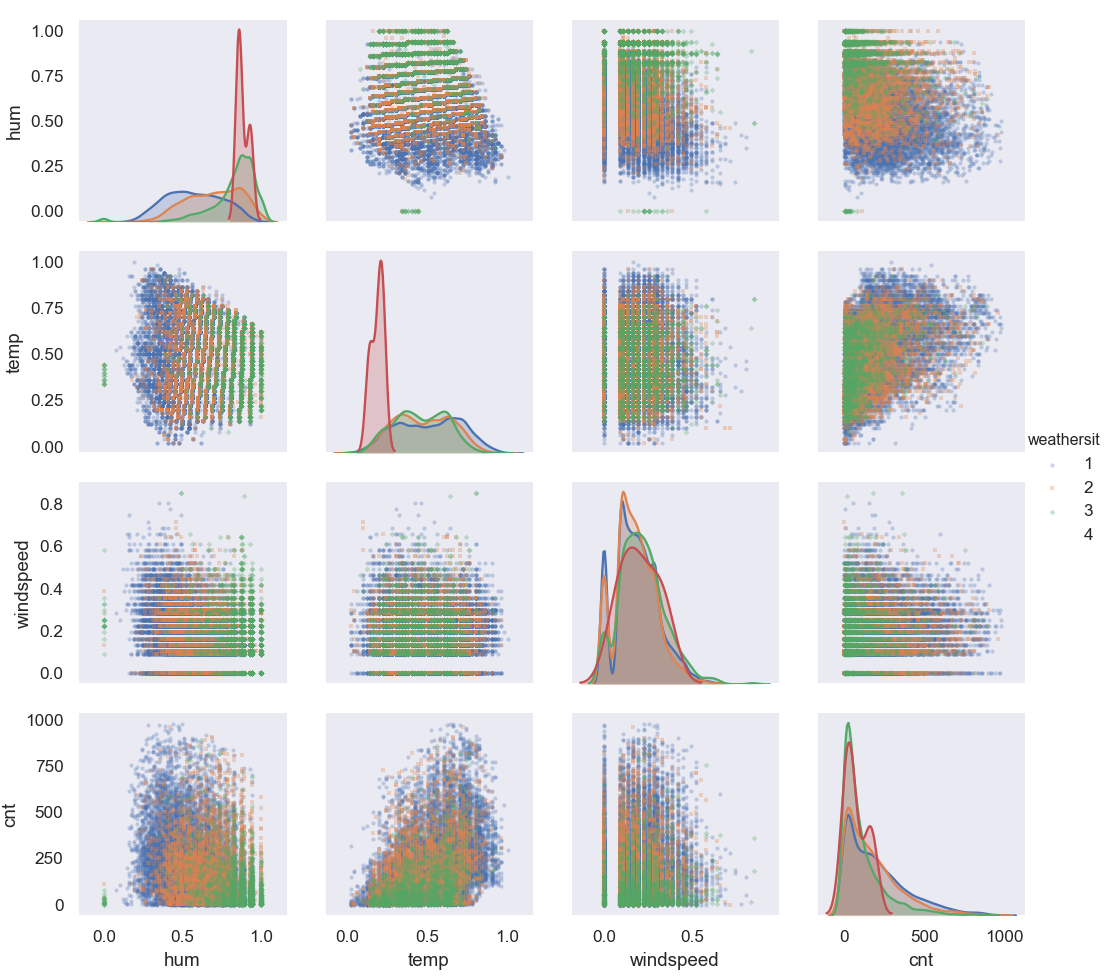

In [83]:
sns.pairplot(data=df_hour,vars=["hum","temp","windspeed","cnt"],hue="weathersit",markers=["o", "s", "D","+"],plot_kws=dict(s=7, edgecolor=None, linewidth=0,alpha=0.3))

## Outliers
A boxplot is a good representation to identify outlier values. The line in the middle of the colored box represents the mean of the distribution, the lower and upper box boundaries show where the Q1(25%) and Q3(75%) percentiles are.  
I will use the the standard seaborn parameters to identify outliers of the distribution: The upper whisker is placed at  1.5 IQR (the interquartile range Q3-Q1) from the Q3 percentile. Everything beyond the whisker is considered an outlier (represented by dots)

<IPython.core.display.Javascript object>


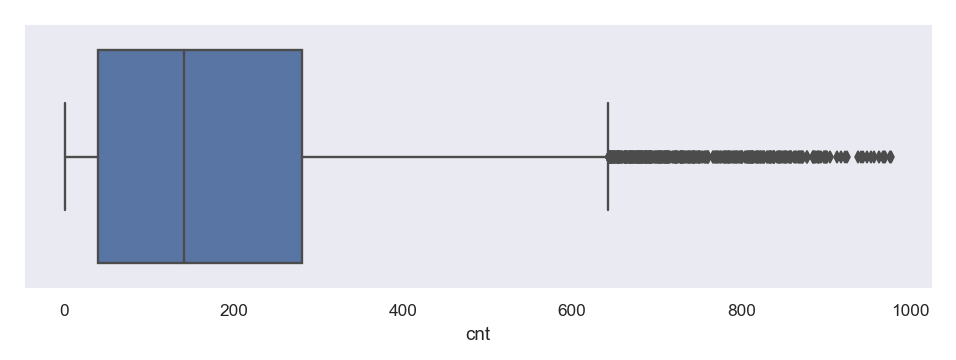

In [84]:
plt.figure( figsize=(8.5,3.2) )
sns.boxplot(x="cnt",data=df_hour,orient='h')
plt.tight_layout()
#plt.savefig("./report/target_boxplot.png",format='png')

In [85]:
# retrieve outlier points from boxplot: https://stackoverflow.com/questions/53735603/extract-outliers-from-seaborn-boxplot
from matplotlib.cbook import boxplot_stats
outliers_iqr = [y for stat in boxplot_stats(df_hour['cnt']) for y in stat['fliers']]
print("number of points at a distance > 1.5 IQR from 75-percentile: {}".format(len(outliers_iqr)))
print("fraction of total data classified as outlier: {:0.3f} %".format ( 100*len(outliers_iqr)/len(df_hour)   ))

number of points at a distance > 1.5 IQR from 75-percentile: 505
fraction of total data classified as outlier: 2.906 %


An alternative approach can be to find the points that lie beyond some standard deviations  w.r.t. to the mean. In practice it means to find points with a z-score greater than some value ( z_score>3 means 3-sigma distance).

In [86]:
from scipy import stats
z = stats.zscore( df_hour["cnt"] )
threshold = 3
index_outliers_zscore = np.where(z > threshold)
outliers_zscore = df_hour["cnt"].iloc[ index_outliers_zscore ]
print("number of points at a distance > 3 sigma from mean: {}".format(len(outliers_zscore)))
print("fraction of total data classified as outlier: {:0.3f} %".format ( 100*len(outliers_zscore)/len(df_hour)   ))

number of points at a distance > 3 sigma from mean: 244
fraction of total data classified as outlier: 1.404 %


We can compare both sets of points classified as outliers:

<IPython.core.display.Javascript object>


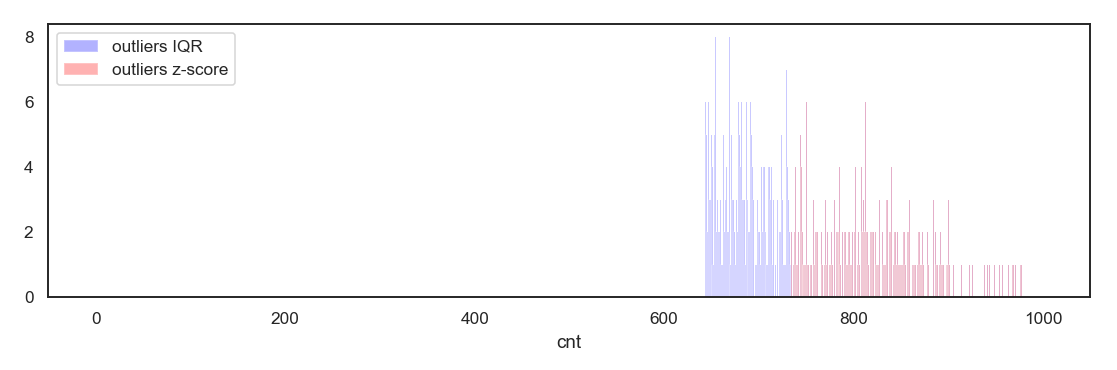

In [88]:
plt.figure(figsize=(8.5,3.2))
ax3 = sns.distplot(outliers_iqr,norm_hist=False,kde=False,bins=range(0,1000,1),label="outliers IQR",
                  hist_kws={"histtype": "bar", "alpha": 0.3, "color": "blue","linewidth": 1})
sns.distplot( outliers_zscore,norm_hist=False,kde=False,bins=range(0,1000,1),
             label="outliers z-score", ax=ax3,
            hist_kws={"histtype": "bar", "linewidth": 1, "alpha": 0.3, "color": "red"})
sns.set_style("white")
ax1.grid(False)
plt.legend(loc="upper left")
plt.tight_layout()
#plt.savefig("./report/target_outliers_comparison.png",format='png')